In [40]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df = pd.read_csv('FinalDataset.csv')

In [42]:
df = df.fillna(0)

In [43]:
Y = df.ix[:,3]
X = df.ix[:,1:3]

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 1)

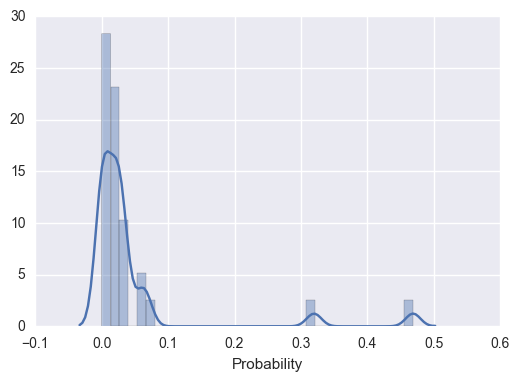

In [45]:
#Visualizing the Probability Distribution.

sns.distplot(y_train,bins=35)

In [46]:
scalar = StandardScaler()

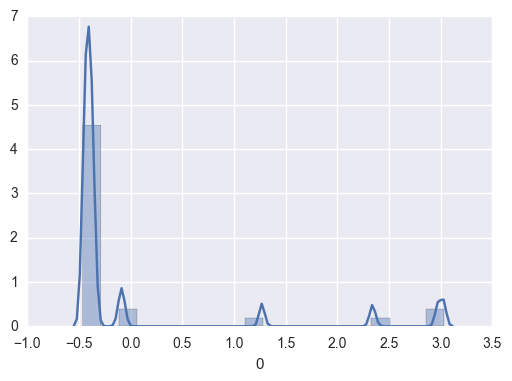

In [47]:
t = scalar.fit_transform(x_train)
df_scaled = pd.DataFrame(t)
sns.distplot(df_scaled.ix[:,0],bins = 20)

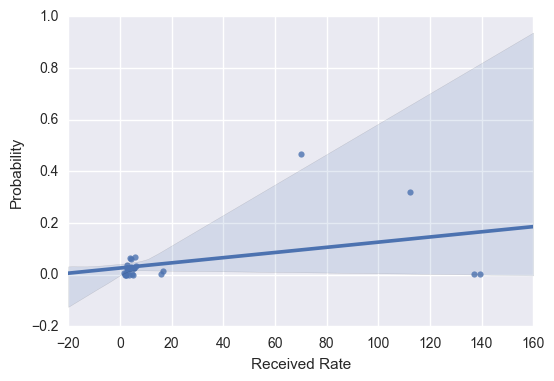

In [48]:
sns.regplot(x_train.ix[:,0],y_train)

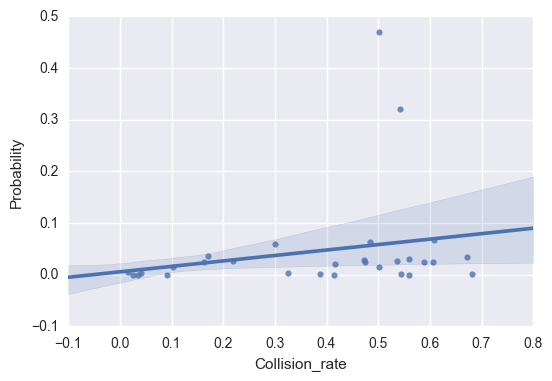

In [49]:
sns.regplot(x_train.ix[:,1],y_train)

In [50]:
df.head()

,Node,Received Rate,Collision_rate,Probability
0,1,112.215777,0.542801,0.319698
1,2,5.300208,0.589468,0.023945
2,3,3.313069,0.209308,0.032219
3,4,136.733099,0.874332,0.057649
4,5,3.947448,0.473441,0.027551


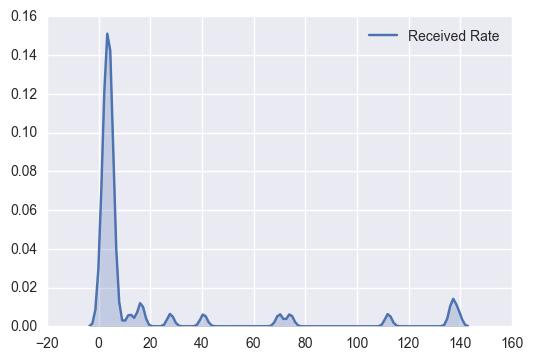

In [51]:
#Visualizing the Probability Distribution.
sns.kdeplot(df.ix[:,1],shade=True,)

In [52]:
df.describe()

,Node,Received Rate,Collision_rate,Probability
count,49.00000,49.000000,49.000000,49.000000
mean,25.00000,18.773469,0.391383,0.052667
std,14.28869,37.178870,0.243359,0.106947
min,1.00000,0.235437,0.000000,0.000000
25%,13.00000,2.791449,0.169769,0.001732
50%,25.00000,4.248665,0.473441,0.023864
75%,37.00000,6.275025,0.560058,0.034029
max,49.00000,139.309865,0.874332,0.468814


In [53]:
rr = np.arange(0,0.46,0.01)

In [54]:
y_test_np = np.array(y_test)
#y_test = pd.DataFrame(y_test)
y_train_np = np.array(y_train)
#y_train = pd.DataFrame(y_train)

In [55]:
y_train_s = pd.DataFrame(y_train)
y_test_s = pd.DataFrame(y_test)
"""y_train_s[y_train>0.0] = 1
y_train_s[y_train<=0.0] = 0

y_test_s[y_test>0.0] = 1
y_test_s[y_test<=0.0] = 0

obj = LogisticRegression()
obj.fit(x_train,y_train_s)
y_pred = obj.predict(x_test)
print f1_score(y_pred,y_test_s)"""

'y_train_s[y_train>0.0] = 1\ny_train_s[y_train<=0.0] = 0\n\ny_test_s[y_test>0.0] = 1\ny_test_s[y_test<=0.0] = 0\n\nobj = LogisticRegression()\nobj.fit(x_train,y_train_s)\ny_pred = obj.predict(x_test)\nprint f1_score(y_pred,y_test_s)'

In [56]:
accuracy = []
for x in rr:
    y_train_s[y_train>x] = 1
    y_train_s[y_train<=x] = 0
    
    y_test_s[y_test>x] = 1
    y_test_s[y_test<=x] = 0
    
    obj = RandomForestClassifier()
    obj.fit(x_train,y_train_s)
    y_pred = obj.predict(x_test)
    print("For value %f we get %f" % (x,f1_score(y_pred,y_test_s)))
    accuracy.append(f1_score(y_pred,y_test_s)*100)

For value 0.000000 we get 0.812500
For value 0.010000 we get 0.750000
For value 0.020000 we get 0.695652
For value 0.030000 we get 0.363636
For value 0.040000 we get 0.500000
For value 0.050000 we get 0.222222
For value 0.060000 we get 0.500000
For value 0.070000 we get 0.500000
For value 0.080000 we get 0.500000
For value 0.090000 we get 0.500000
For value 0.100000 we get 0.500000
For value 0.110000 we get 0.500000
For value 0.120000 we get 0.000000
For value 0.130000 we get 0.000000
For value 0.140000 we get 0.500000
For value 0.150000 we get 0.500000
For value 0.160000 we get 0.000000
For value 0.170000 we get 0.000000
For value 0.180000 we get 0.500000
For value 0.190000 we get 0.500000
For value 0.200000 we get 0.666667
For value 0.210000 we get 0.666667
For value 0.220000 we get 0.000000
For value 0.230000 we get 0.000000
For value 0.240000 we get 0.666667
For value 0.250000 we get 0.666667
For value 0.260000 we get 0.666667
For value 0.270000 we get 1.000000
For value 0.280000 w

In [19]:
accuracy

[84.848484848484844,
 66.666666666666657,
 61.53846153846154,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]